### MACHINE LEARNING FOR ANALYSIS AND PREDICTION OF ATTRITION

**The objective of this mini project is to enable practice in data analysis and prediction by classification and
clustering algorithms.**

#### Problem Statement

Attrition is the rate at which employees leave their job. When attrition reaches high levels, it becomes a
concern for the company. Therefore, it is important to find out why employees leave, which factors contribute
to such significant decision.

### Enviroment

#### 1. Data wrangling and exploration

- Load and explore the data, clean it, and analyse it by statistics
- Select the most relevant features of an employee for machine learning operations on prediction of
the attrition

In [1]:
# data structure
import pandas as pd

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


# for numeric calculations
import numpy as np

In [2]:
df = pd.read_excel('WA_Fn-UseC_-HR-Employee-Attrition.xlsx')

In [3]:
# view df size
df.shape

(1470, 35)

In [4]:
# view df
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
# get an overview missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# view amount of uniqie values of object data type
df.select_dtypes(include='object').nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [7]:
# map each non-numeric value to numeric values
column_mappings = {
    'Attrition': {'No': 0, 'Yes': 1},
    'BusinessTravel': {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2},
    'Department': {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2},
    'EducationField': {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5},
    'Gender': {'Male': 0, 'Female': 1},
    'JobRole': {'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8},
    'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2},
    'Over18': {'Y': 1},
    'OverTime': {'No': 0, 'Yes': 1}
}

df.replace(column_mappings, inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,2,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,1,23,2,2,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,1,6,1,2,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,1,4,3,0,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,2,2,3,2,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [8]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,1.260544,9.192517,2.912925,1.462585,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,0.527792,8.106864,1.024165,1.431780,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,0.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,2.000000,14.000000,4.000000,2.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


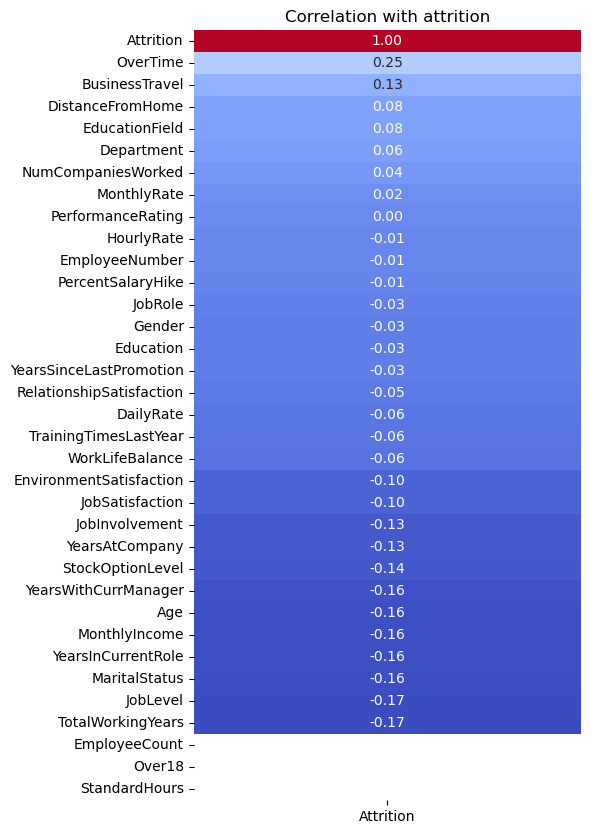

In [9]:
# correlation between attrition and other features
correlation_matrix = df.corr()
correlation_with_attrition = correlation_matrix['Attrition'].sort_values(ascending=False)

# heatmap 
plt.figure(figsize=(5, 10))
sns.heatmap(pd.DataFrame(correlation_with_attrition), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation with attrition')
plt.show()

#### Prepare the data for training

#### Data split 

- y is our target the value (the value we wanna try to predict)
- X is our feature matrix (the data we use to try an predict our target value)

In [10]:
# define X and y
X = df[['OverTime', 'BusinessTravel', 'TotalWorkingYears', 'MaritalStatus', 'YearsInCurrentRole']].values
y = df['Attrition'].values

In [11]:
# split 80/20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

#### Training the model (Decision Tree)

In [12]:
# initialize decision tree
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Install the graphviz package
#!pip install graphviz

In [14]:
import graphviz
from sklearn.tree import export_graphviz

# draw tree 
gr_data = export_graphviz(model, out_file=None, 
                          feature_names=['OverTime', 'BusinessTravel', 'TotalWorkingYears', 'MaritalStatus', 'YearsInCurrentRole'],
                          class_names=True, filled=True, rounded=True, proportion=False, special_characters=True)  

dtree = graphviz.Source(gr_data)

dtree.render("decision_tree")  # Optionally save the tree to a file

'decision_tree.pdf'

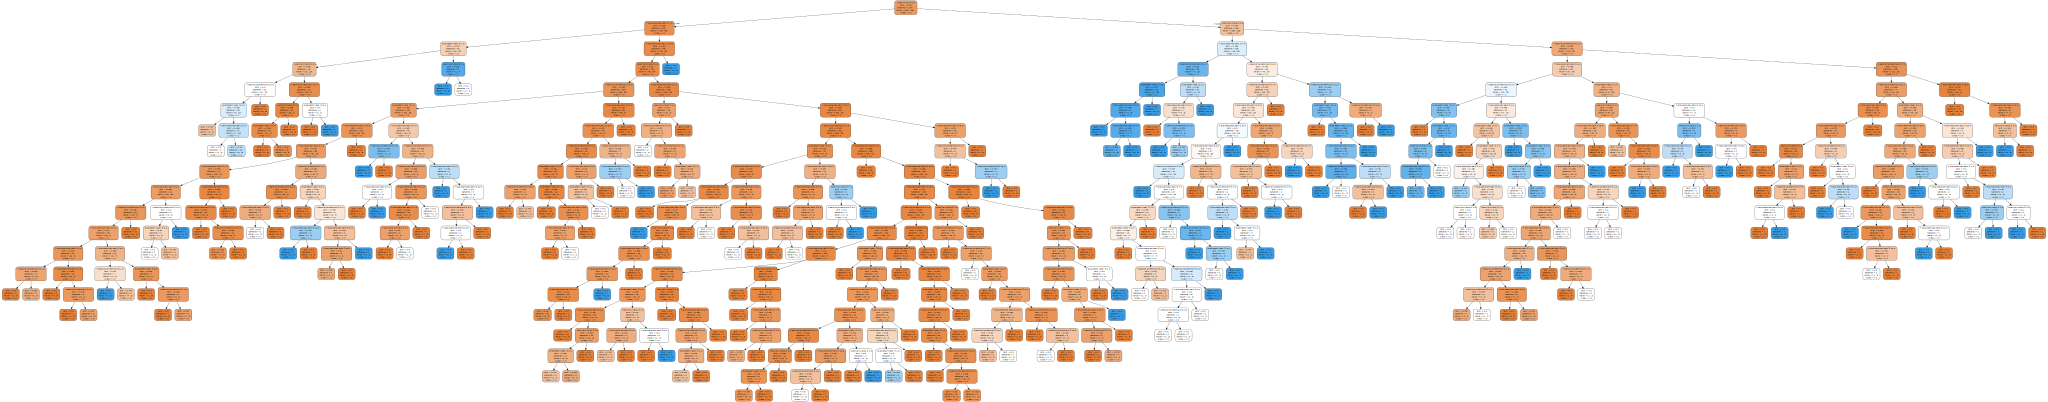

In [15]:
# view tree
dtree 

### Model Validation

We need a metrics for the evaluation. ‘accuracy‘ is the percentage % of correctly predicted instances from the total number of instances in the dataset.

#### Now we can try to implement the model on our test set.



In [16]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

#### Predict test data

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7993197278911565


#### Confusion matrix

In [18]:
# confusion matrix
confusion_mat = confusion_matrix(y_test,y_pred)
confusion_mat

array([[223,  32],
       [ 27,  12]])

In [19]:
pd.crosstab(y_test,y_pred)

col_0,0,1
row_0,,
0,223,32
1,27,12


               | Predicted Negative | Predicted Positive |

    Actual Negative|       TN            |        FP           |

              
    Actual Positive|       FN            |        TP           |

Here is a quick summarization: 

- Of the 255 0's (attrition = no) the model predicited 223 correct and 32 wrong. 
- Of the 31 1's (attrintion = yes) the model predicited 27 true and 12 wrong. 

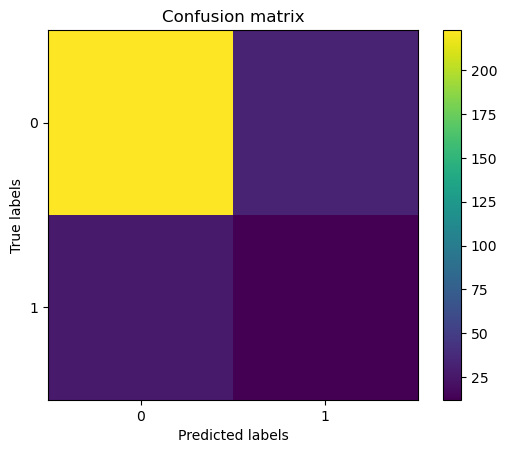

In [20]:
# visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

#### Compare scores for Train and Test data

In [21]:
class_names = ['Not Attrition', 'Attrition']

# classifier performance on training dataset
print("Classification Report - Training Data:")
print(classification_report(y_train, model.predict(X_train), target_names=class_names))
plt.show()

# classifier performance on test dataset
print("Classification Report - Test Data:")
print(classification_report(y_test, model.predict(X_test), target_names=class_names))
plt.show()

Classification Report - Training Data:
               precision    recall  f1-score   support

Not Attrition       0.93      0.99      0.96       978
    Attrition       0.91      0.63      0.74       198

     accuracy                           0.93      1176
    macro avg       0.92      0.81      0.85      1176
 weighted avg       0.93      0.93      0.92      1176

Classification Report - Test Data:
               precision    recall  f1-score   support

Not Attrition       0.89      0.87      0.88       255
    Attrition       0.27      0.31      0.29        39

     accuracy                           0.80       294
    macro avg       0.58      0.59      0.59       294
 weighted avg       0.81      0.80      0.80       294



### Naive Bayes

In [22]:
# define X and y directly from DataFrame
X = df[['OverTime', 'BusinessTravel', 'TotalWorkingYears', 'MaritalStatus', 'YearsInCurrentRole']].values
y = df['Attrition'].values

In [23]:
# split 80/20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

We are ready to apply algorithms for training a model from our data. We try Gaussian Naive Bayes (NB), as it is appropriate for analysis of numeric data.

In [24]:
# build the model from the train
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [25]:
# test the model on the test set
model.score(X_test, y_test)

0.8571428571428571

 #### Validating the Model

In [26]:
X_test

array([[ 0,  1,  6,  0,  4],
       [ 0,  1,  5,  2,  2],
       [ 0,  1,  1,  1,  0],
       ...,
       [ 1,  1, 25,  1,  2],
       [ 0,  1,  4,  0,  0],
       [ 1,  1,  8,  1,  6]])

In [27]:
# Test on the test data, try prediction
prediction = model.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
prediction.shape

(294,)

Estimate the Accuracy


In [29]:
# Calculated accuracy of the model over the validation set
print(accuracy_score(y_test, prediction))

0.8571428571428571


In [30]:
# Classification report provides a breakdown of each class by precision, recall, f1-score and support
cmat = confusion_matrix(y_test, prediction)
print(cmat)
print(classification_report(y_test, prediction))

[[244  11]
 [ 31   8]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       255
           1       0.42      0.21      0.28        39

    accuracy                           0.86       294
   macro avg       0.65      0.58      0.60       294
weighted avg       0.83      0.86      0.84       294



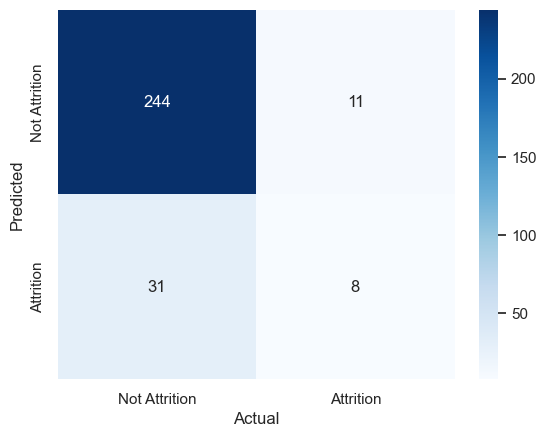

In [31]:
sns.set()
sns.heatmap(cmat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [32]:
class_names = ['Not Attrition', 'Attrition']

# classifier performance on training dataset
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, model.predict(X_train), target_names=class_names))

# classifier performance on test dataset
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, model.predict(X_test), target_names=class_names))


Classifier performance on training dataset

               precision    recall  f1-score   support

Not Attrition       0.87      0.95      0.91       978
    Attrition       0.55      0.30      0.39       198

     accuracy                           0.84      1176
    macro avg       0.71      0.63      0.65      1176
 weighted avg       0.82      0.84      0.82      1176


Classifier performance on test dataset

               precision    recall  f1-score   support

Not Attrition       0.89      0.96      0.92       255
    Attrition       0.42      0.21      0.28        39

     accuracy                           0.86       294
    macro avg       0.65      0.58      0.60       294
 weighted avg       0.83      0.86      0.84       294



### Models with the highest accuracy apears to be Naive Bayes

### Unsupervised Machine Learning by K-Means Algorithm

#### 3. Unsupervised machine learning: clustering
- apply at least one clustering algorithm (e.g. K-Means) for segmentation of the employees in groups of
similarity
- evaluate the quality of the clustering by calculating a silhouette score and recommend the cluster
configuration with higher score

#### 2. Supervised machine learning: classification

- train, test, and validate two machine learning models for classification and prediction of attrition (e.g.
Decision Tree and Naïve Bayes)
- apply appropriate methods and measures for assessing the validity of the models and recommend the
one with highest accuracy

#### Determine K by Elbow Method


I want to the find the optimal amount of clusters by using the the elbow method. K stands for the number of clusters

In [33]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10).fit(X)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
print("Distortion: ", distortions)

Distortion:  [4.841986170704859, 3.927845448113809, 3.5313525329341697, 3.219709032484346, 2.769532775675133, 2.6047778820462764, 2.399166603113214, 2.2404180937770146]


Distortion measures the average distance between each data point and the centroid in the cluster.
In our data, it looks like the distortion falls when the number of clusters (K) increases. The goal is to find the point where further increase of K does not result in a noticeable improvement of distortion. This is the elbow point.

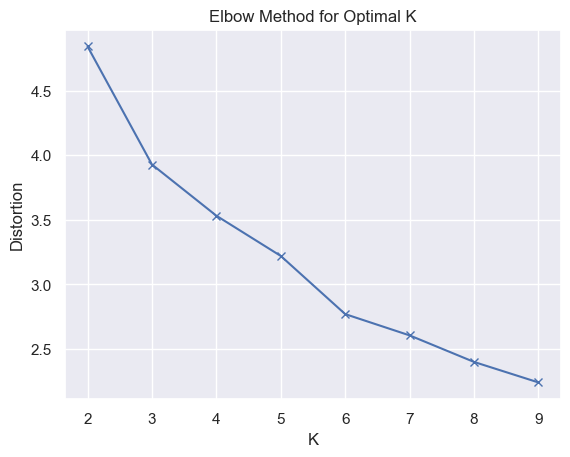

In [34]:
# Plot the distortion to discover the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

#### 4. Machine Learning application
- create and deploy on the localhost an interactive prototype of Streamlit application, visualizing stages
and results of your work
- enable input of user data and making predictions on attrition by use of the classification model,
created in p.2 above.
- test the application with various previously unknown input data and record the results.



Submit a link to the Github repository of your solution, where in the readme file provide answers of the
following questions:
    

- Which machine learning methods did you choose to apply in the application?
- How accurate is your solution of prediction?
- Which are the most decisive factors for quitting a job?
- Which work positions and departments are in higher risk of losing employees?
- Are employees of different gender paid equally in all departments?
- Do the family status and the distance from work influence the work-life balance?
- Does education make people happy (satisfied from the work)?
- Which were the challenges in the project development?